In [2]:
import librosa as lb
import os, glob, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sound_feature_extraction as sfe

from librosa.display import specshow, waveplot
from pydub import AudioSegment
np.random.seed(9) #For the Mighty Nein!

# Phase 1 - Problem Definition

## 1.1 Broad Goals

A Speech Emotion Recognition model allows a program to correctly identify the emotional state of a speaker.

## 1.2 Data Source

The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) includes 24 professional voice actors, 12 male, 12 female speaking the same two lines.  The full dataset includes both audio and visual files.  

### Spoken Files
| Actor |  Emotion | Intensity      | Statement | Repetition |
| :---: |:--------:| :-------------:| :--------:| :--------: |
| 01- 24| calm     | normal, strong | 01, 02    |  01, 02    |
| 01- 24| happy    | normal, strong | 01, 02    |  01, 02    |
| 01- 24| sad      | normal, strong | 01, 02    |  01, 02    |
| 01- 24| angry    | normal, strong | 01, 02    |  01, 02    |
| 01- 24| fearful  | normal, strong | 01, 02    |  01, 02    |
| 01- 24| surprise | normal, strong | 01, 02    |  01, 02    |
| 01- 24| disgust  | normal, strong | 01, 02    |  01, 02    |
| 01- 24| neutral  | normal         | 01, 02    |  01, 02    |

Statement 01:  "Kids are talking by the door"

Statement 02:  "Dogs are sitting by the door"

Intensity 01:  "Normal"

Intensity 02:  "Strong"

### Song Files
| Actor |  Emotion | Intensity      | Statement | Repetition |
| :---: |:--------:| :-------------:| :--------:| :--------: |
| 01- 24| calm     | normal, strong | 01, 02    |  01, 02    |
| 01- 24| happy    | normal, strong | 01, 02    |  01, 02    |
| 01- 24| sad      | normal, strong | 01, 02    |  01, 02    |
| 01- 24| angry    | normal, strong | 01, 02    |  01, 02    |
| 01- 24| fearful  | normal, strong | 01, 02    |  01, 02    |




Full Dataset available at:
https://smartlaboratory.org/ravdess/


For the purposes of this project we will be examining the audio-only files.

## Phase 2: Data Gathering

### 2.1 Load targets to DF

In [3]:
tar_emotions = ['happy', 'sad', 'angry', 'fearful']
actor_10 = sfe.load_targets(tar_emotions, '10')

Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 180
Len after mfcc: 40
Len after chroma: 52
Len after mel: 1

In [4]:
actor_10.head()

,file_name,emotion,feature
0,03-02-05-01-02-01-10,angry,"[-449.70578, 28.980103, -20.934938, 4.7438617,..."
1,03-01-03-02-02-02-10,happy,"[-358.90125, 27.535181, -31.962467, -0.3631144..."
2,03-02-06-01-02-02-10,fearful,"[-519.9812, 31.606262, -6.8212767, -0.8707459,..."
3,03-02-06-02-01-02-10,fearful,"[-426.03595, 32.351036, -32.652767, 4.0545797,..."
4,03-01-03-01-01-02-10,happy,"[-499.81458, 46.448856, -10.837826, 4.436974, ..."


In [8]:
a10_s01 = actor_10[actor_10['statement'] == statements['01']].copy()
a10_s02 = actor_10[actor_10['statement'] == statements['02']].copy()

## Phase 3: Exploratory Data Analysis

In [9]:
def plot_spectrograms_and_waveform(y):
    sr = 22050 #standard librosa sample rate.
    fig, ax = plt.subplots(nrows = 3, ncols = 1, sharex = True, figsize=(12, 12))
    D = lb.amplitude_to_db(np.abs(lb.stft(y)), ref=np.max)
    img = lb.display.specshow(D, y_axis='linear', x_axis='time',
                                sr=sr, ax=ax[0])
    ax[0].set(title='Linear-frequency power spectrogram')
    ax[0].label_outer()
    hop_length = 1024
    D = lb.amplitude_to_db(np.abs(lb.stft(y, hop_length=hop_length)),
                                ref=np.max)
    lb.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                            x_axis='time', ax=ax[1])
    ax[1].set(title='Log-frequency power spectrogram')
    ax[1].label_outer()
    fig.colorbar(img, ax=ax, format="%+2.f dB")

    lb.display.waveplot(y, sr)
    ax[2].set(title='Waveplot');

### 3.1 Visualizations

The librosa sound code library 

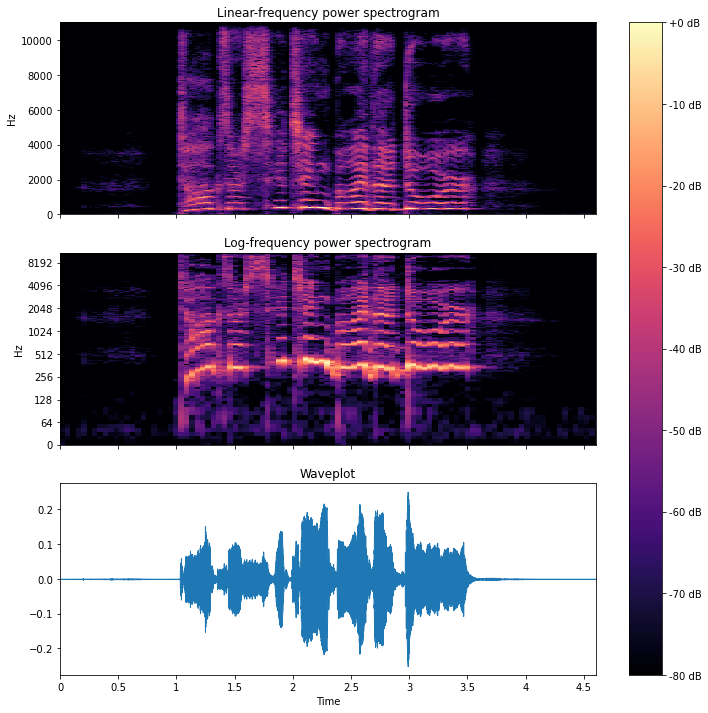

In [10]:
plot_spectrograms_and_waveform(actor_10.loc[0, 'y'])

In [11]:
def plot_waves(data, emotion, figsize):
    song_i = 0
    speech_i = 0
    subset = data[data['emotion'] == emotion]
    length = int(subset.shape[0] / 2)
    fig, axs = plt.subplots(nrows = length, ncols = 2, sharex = True, sharey = True, figsize = figsize)
    for index, row in subset.iterrows():
        if row['channel'] == 'song':
            axs[song_i, 1].plot(row['y'])
            axs[song_i, 1].set_title(f"{row['emotion']} {row['channel']}")
            song_i += 1 
        elif row['channel'] == 'speech':
            axs[speech_i, 0].plot(row['y'])
            axs[speech_i, 0].set_title(f"{row['emotion']} {row['channel']}")
            speech_i += 1
    plt.tight_layout()
    plt.show()

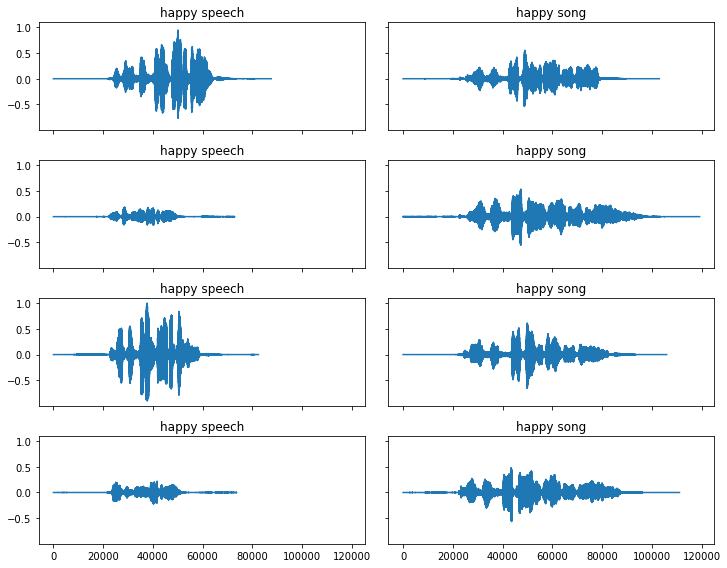

In [12]:
plot_waves(a10_s02, 'happy',  (10, 8))

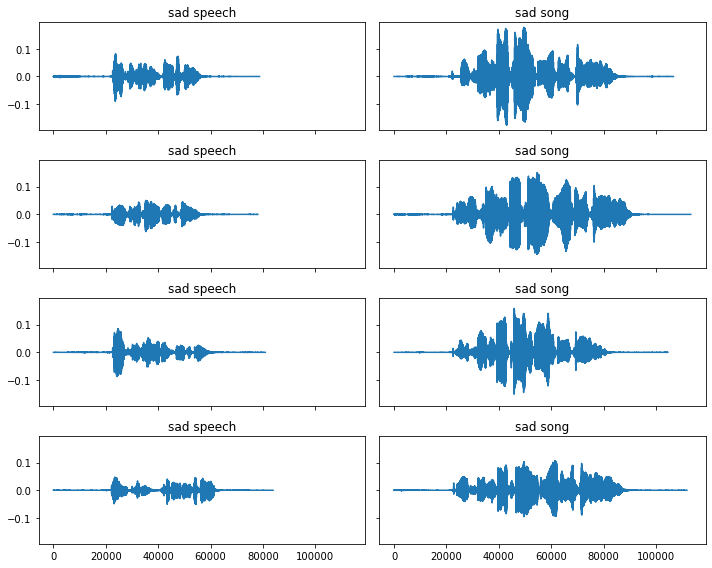

In [13]:
plot_waves(a10_s02, 'sad', (10, 8))

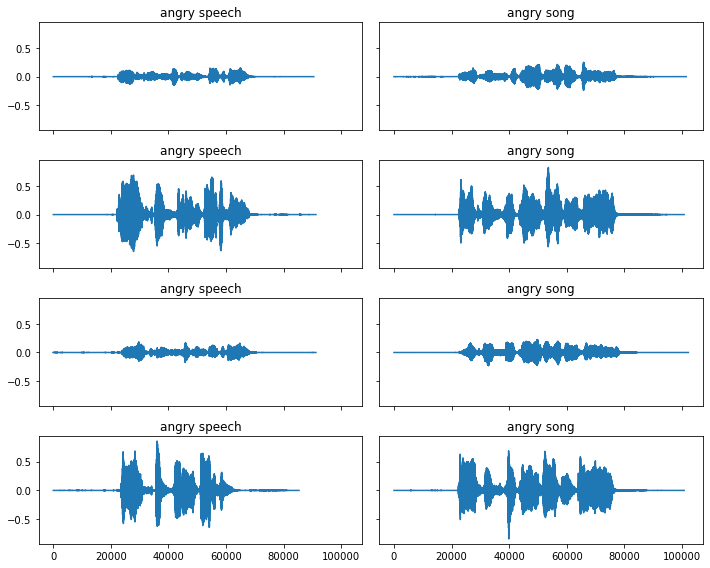

In [14]:
plot_waves(a10_s02, 'angry', (10, 8))

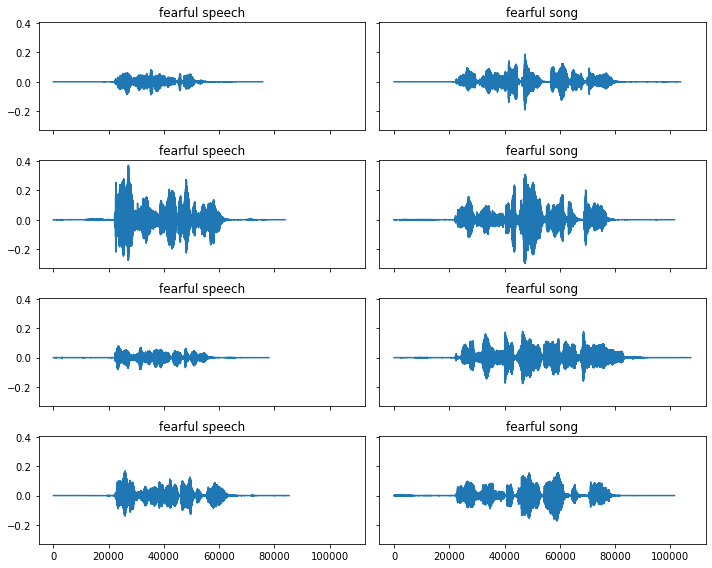

In [15]:
plot_waves(a10_s02, 'fearful', (10, 8))